# Linear Regression Project

### You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

### Problem: The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out!

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Getting started with data

In [14]:
df = pd.read_csv('Ecommerce Customers')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


In [28]:
df[['Yearly Amount Spent','Length of Membership']]

,Yearly Amount Spent,Length of Membership
0,587.951054,4.082621
1,392.204933,2.664034
2,487.547505,4.104543
3,581.852344,3.120179
4,599.406092,4.446308
...,...,...
495,573.847438,3.746573
496,529.049004,3.576526
497,551.620145,4.958264
498,456.469510,2.336485


In [26]:
df.corr() # to see the correlations between features

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


In [ ]:
jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?

# Data Analysis

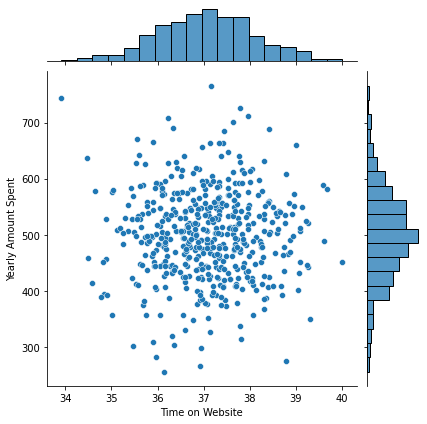

In [29]:
sns.jointplot(data=df, x="Time on Website", y="Yearly Amount Spent")

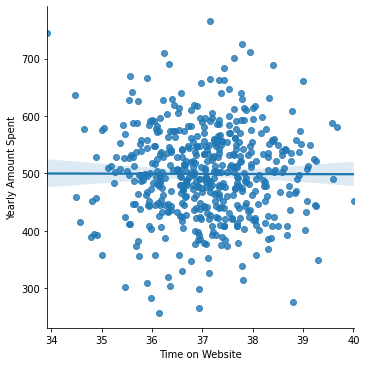

In [32]:
sns.lmplot(x='Time on Website',y='Yearly Amount Spent', data=df)

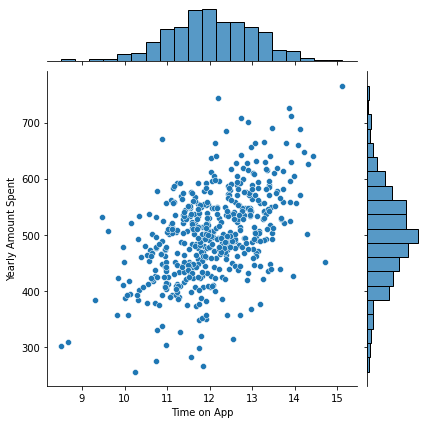

In [31]:
# Similar for the spent tme on app and yearly amount spent
sns.jointplot(data=df, x="Time on App", y="Yearly Amount Spent")

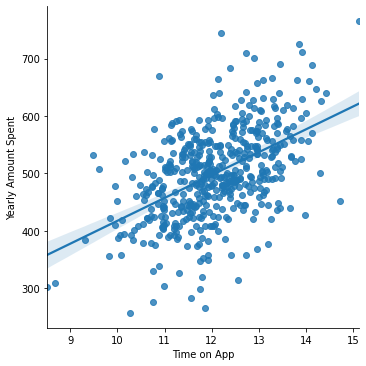

In [33]:
sns.lmplot(x='Time on App',y='Yearly Amount Spent', data=df)

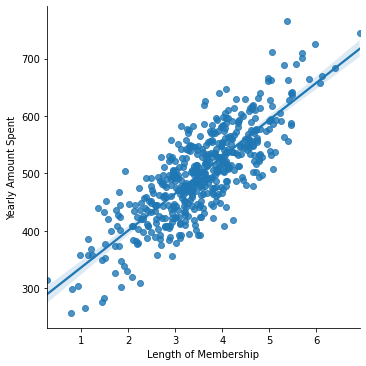

In [34]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=df)

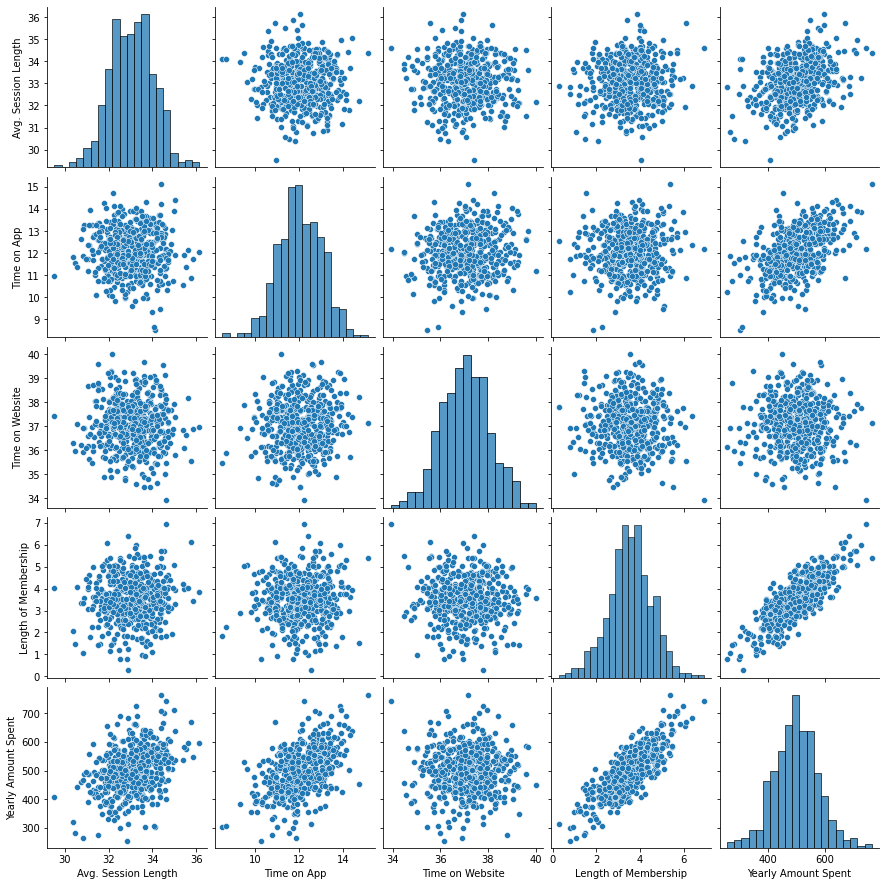

In [35]:
sns.pairplot(df) # we see the correlations

In [37]:
# Based off this plot Length of Membership the most correlated feature with Yearly Amount Spent

# Train and Test Data
** I split the data as train and test data.

In [42]:
X = df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y=df['Yearly Amount Spent']

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 101)

# Training Model

In [46]:
from sklearn.linear_model import LinearRegression

In [54]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [63]:
print('Coefficients\n', lm.coef_ ) 

Coefficients
 [25.98154972 38.59015875  0.19040528 61.27909654]


In [90]:
Coefficients = pd.DataFrame(X.columns, lm.coef_)
Coefficients.columns = ['Coefficients']
Coefficients

,Coefficients
25.981550,Avg. Session Length
38.590159,Time on App
0.190405,Time on Website
61.279097,Length of Membership


In [91]:
# to find predicted y, we used this
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

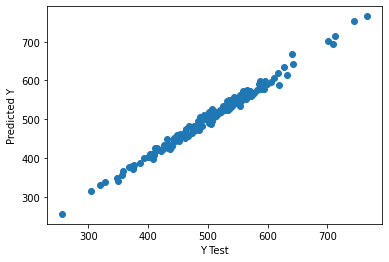

In [92]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Evaluating Model
* Now we need to evaluate our model using linear regresiion metrics

In [83]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.22814865343082
MSE: 79.81305165097419
RMSE: 8.93381506697862


# Conclusion

### if we keep all other variables constant, 
### one unit change in Avg. Length Session is associated with an increase of 25.98 total dollars spent.
### one unit change in Time on App is associated with an increase of 38.59 total dollars spent.
### one unit change in Time on Website is associated with an increase of 0.19 total dollars spent.
### one unit change in Length of Membership is associated with an increase of 61.27 total dollars spent.